In [47]:
import pandas as pd
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('../datasets/Position_Salaries.csv')

In [49]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [50]:
fig = px.scatter(data_frame=df,x='Level',y='Salary')
fig.write_html('abc.html',auto_open=True)

In [51]:
x = df[['Level']]
y = df['Salary']

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
pf = PolynomialFeatures(degree=6)
px = pf.fit_transform(x)


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg = LinearRegression()
reg.fit(px, y)
reg.score(px,y) * 100

99.99494749253775

In [56]:
ypred = reg.predict(px)

In [57]:
df['pred'] = ypred

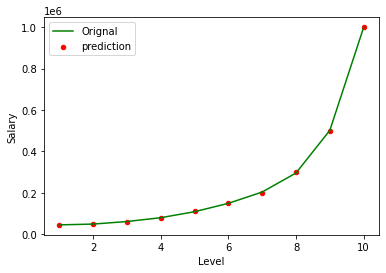

In [58]:
ax = df.plot.scatter(x='Level',y='Salary',label='Orignal',color='red')
df.plot.line(x='Level',y='pred',label='prediction',ax=ax,color='green')
plt.show()

In [59]:
from templates import save_model

In [60]:
model = {'polynomial':pf,'reg':reg,'description':'prediction salary according to position'}

In [61]:
save_model(model,'../models/position_salary.pk')

True

In [62]:
df.Position.tolist()

['Business Analyst',
 'Junior Consultant',
 'Senior Consultant',
 'Manager',
 'Country Manager',
 'Region Manager',
 'Partner',
 'Senior Partner',
 'C-level',
 'CEO']